Done:
- Segmentation (1280x960) and Depth (640x480) are aligned
Does
- Align Opical Flow

In [1]:
import sys
import os
sys.path.append( """/home/jonfrey/ASL/src""")

from torchvision import transforms as tf 
import torch
import time 
from pathlib import Path
import imageio

import matplotlib.pyplot as plt
from time import time
from glob import glob
import matplotlib

import cv2
import numpy as np
from PIL import Image
from scipy import ndimage

# Modules
from visu import Visualizer

In [4]:
from pseudo_label import *
depth_paths = getPathsDepth()
segmentation_paths = getPathsSegmentation()
flow_paths = getFlowPaths()
depth_paths = getPathsFlow()

['/home/jonfrey/datasets/scannet/scans/scene0000_00/depth_estimate/0.png',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/depth_estimate/10.png',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/depth_estimate/20.png',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/depth_estimate/30.png',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/depth_estimate/40.png',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/depth_estimate/50.png',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/depth_estimate/60.png',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/depth_estimate/70.png',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/depth_estimate/80.png',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/depth_estimate/90.png',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/depth_estimate/100.png',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/depth_estimate/110.png',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/depth_estimate/120.png',
 '/home/jo

In [2]:
# Images
base = "/home/jonfrey/datasets/scannet"
image_pths = [str(p) for p in glob( base+'/**/*.jpg', recursive=True ) if str(p).find('color') != -1]
fun = lambda x : x.split('/')[-3][-7:] + '_'+ str( "0"*(6-len( x.split('/')[-1][:-4]))) + x.split('/')[-1][:-4]  
image_pths.sort(key=fun)
image_pths

['/home/jonfrey/datasets/scannet/scans/scene0000_00/color/0.jpg',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/color/1.jpg',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/color/2.jpg',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/color/3.jpg',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/color/4.jpg',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/color/5.jpg',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/color/6.jpg',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/color/7.jpg',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/color/8.jpg',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/color/9.jpg',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/color/10.jpg',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/color/11.jpg',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/color/12.jpg',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/color/13.jpg',
 '/home/jonfrey/datasets/scannet/scans/scene0000_00/color/14.jpg',
 '/ho

In [3]:
# Depths
base = "/home/jonfrey/datasets/scannet/scans/scene0000_00/depth_estimate"
depth_pths = [str(p) for p in glob( base+'/**/*.png', recursive=True ) if str(p).find('depth_estimate') != -1 and str(p).find('preview') == -1 ]
fun = lambda x : x.split('/')[-3][-7:] + '_'+ str( "0"*(6-len( x.split('/')[-1][:-4]))) + x.split('/')[-1][:-4]  
depth_pths.sort(key=fun)

depth_pths = [d for d in depth_pths if int( d.split('/')[-1][:-4])%10 == 0]

In [15]:
# Flows
base = "/home/jonfrey/results/scannet_eval/run_24h_train_1gpu/scannet"
flow_pths = [str(p) for p in glob( base+'/**/*.png', recursive=True ) if str(p).find('flow') != -1]
#flow_low_pths = [str(p) for p in glob( base+'/**/*.png', recursive=True ) if str(p).find('flow_low_') != -1]
fun = lambda x :x.split('/')[-3]+ '0'*(8-len((x.split('/')[-1]).split('_')[-1]))+(x.split('/')[-1]).split('_')[-1]
flow_pths.sort(key=fun)

flow_pths
#flow_low_pths.sort(key=fun)

['/home/jonfrey/results/scannet_eval/run_24h_train_1gpu/scannet/scene0000_00/flow/0.png',
 '/home/jonfrey/results/scannet_eval/run_24h_train_1gpu/scannet/scene0000_00/flow/10.png',
 '/home/jonfrey/results/scannet_eval/run_24h_train_1gpu/scannet/scene0000_00/flow/20.png',
 '/home/jonfrey/results/scannet_eval/run_24h_train_1gpu/scannet/scene0000_00/flow/30.png',
 '/home/jonfrey/results/scannet_eval/run_24h_train_1gpu/scannet/scene0000_00/flow/40.png',
 '/home/jonfrey/results/scannet_eval/run_24h_train_1gpu/scannet/scene0000_00/flow/50.png',
 '/home/jonfrey/results/scannet_eval/run_24h_train_1gpu/scannet/scene0000_00/flow/60.png',
 '/home/jonfrey/results/scannet_eval/run_24h_train_1gpu/scannet/scene0000_00/flow/70.png',
 '/home/jonfrey/results/scannet_eval/run_24h_train_1gpu/scannet/scene0000_00/flow/80.png',
 '/home/jonfrey/results/scannet_eval/run_24h_train_1gpu/scannet/scene0000_00/flow/90.png',
 '/home/jonfrey/results/scannet_eval/run_24h_train_1gpu/scannet/scene0000_00/flow/100.png',

In [5]:
# Segmentation
base = "/home/jonfrey/results/scannet_eval/run_24h_train_1gpu"
segmentation_pths = [str(p) for p in glob( base+'/**/*.png', recursive=True ) if str(p).find('segmentation_estimate') != -1]
fun = lambda x : x.split('/')[-3][-7:] + '_'+ str( "0"*(6-len( x.split('/')[-1][:-4]))) + x.split('/')[-1][:-4]  
segmentation_pths.sort(key=fun)

In [37]:
def readFlowKITTI(filename):
    flow = cv2.imread(filename, cv2.IMREAD_ANYDEPTH|cv2.IMREAD_COLOR)
    flow = flow[:,:,::-1].astype(np.float32)
    flow, valid = flow[:, :, :2], flow[:, :, 2].astype(bool)
    flow = (flow - 2**15) / 64.0
    H,W = 960,1280
    return flow, valid
flow, valid = readFlowKITTI(flow_pths[10])

(480, 640, 2)


In [7]:
def readDepth(filename): 
    H,W = 960,1280
    im = imageio.imread(filename)
    im = im.astype(np.float32)
    im = im / 1000
    im = ndimage.zoom(im, (H/im.shape[0],W/im.shape[1]) , order=1)
    return im
readDepth(depth_pths[0])

array([[1.806    , 1.7915113, 1.7770226, ..., 1.5600375, 1.5840187,
        1.608    ],
       [1.7895172, 1.7785221, 1.7675271, ..., 1.5375527, 1.5562936,
        1.5750345],
       [1.7730345, 1.765533 , 1.7580316, ..., 1.515068 , 1.5285685,
        1.5420688],
       ...,
       [1.703003 , 1.6930046, 1.6830063, ..., 1.7450156, 1.753013 ,
        1.7610104],
       [1.7045015, 1.6915085, 1.6785157, ..., 1.7465168, 1.756261 ,
        1.7660053],
       [1.706    , 1.6900125, 1.674025 , ..., 1.748018 , 1.759509 ,
        1.771    ]], dtype=float32)

In [8]:
def readSegmentation(filename):
    im = imageio.imread(filename)
    pred = im[:,:,0].astype(np.int32)
    target = im[:,:,1].astype(np.int32)
    valid = im[:,:,2].astype(bool)
    pred -= 1
    target -= 1
    return pred, target, valid
pred, target, valid = readSegmentation(segmentation_pths[300])

Failed converting tensor to numpy


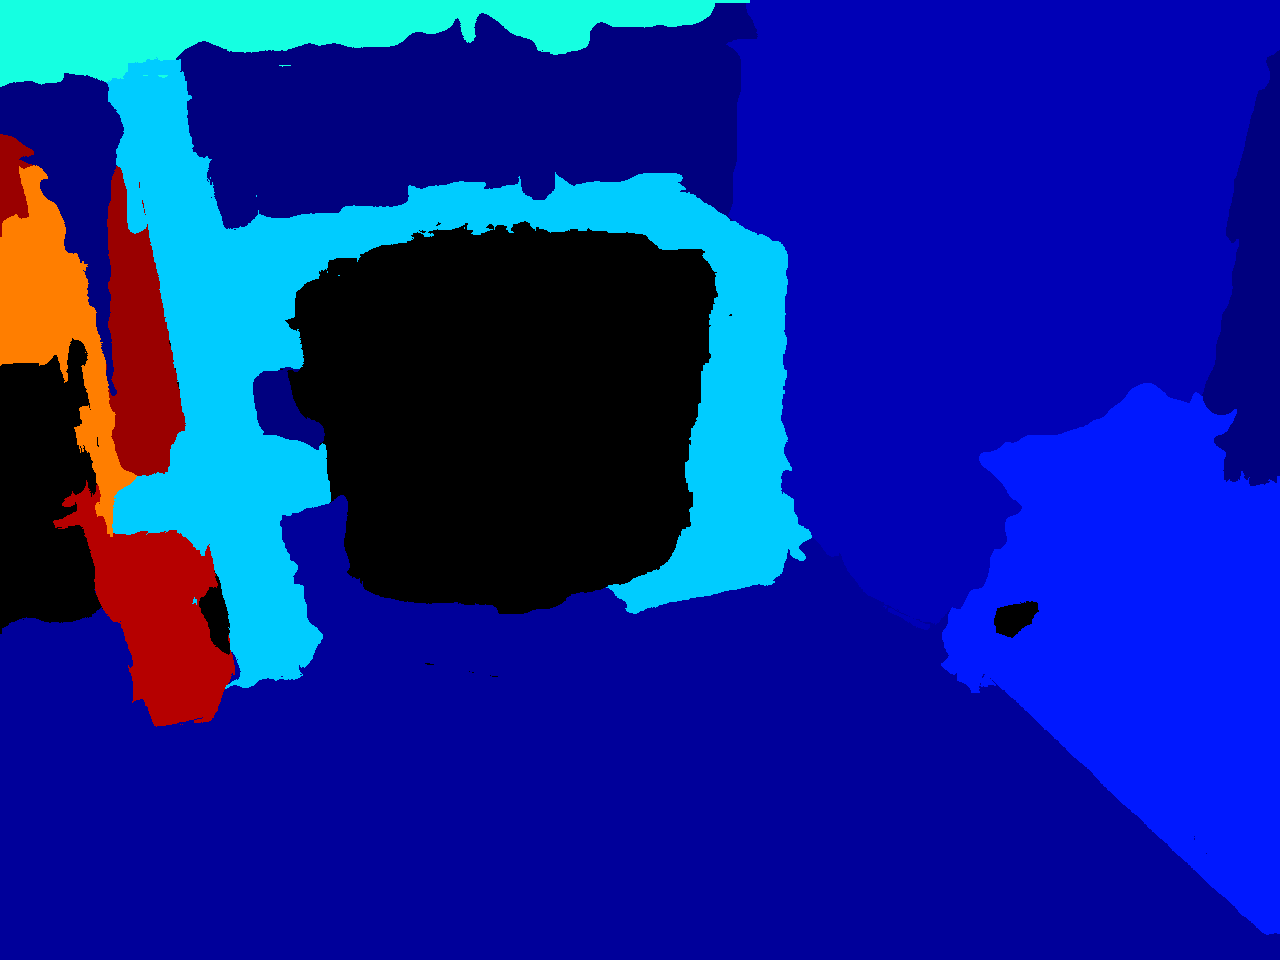

Failed converting tensor to numpy


In [29]:
visu = Visualizer(os.getenv('HOME')+'/tmp', logger=None, epoch=0, store=False, num_classes=41)
pred, target, valid = readSegmentation(segmentation_pths[20])
#ret = visu.plot_segmentation(seg=pred, jupyter=True)
ret = visu.plot_segmentation(seg=target, jupyter=True)

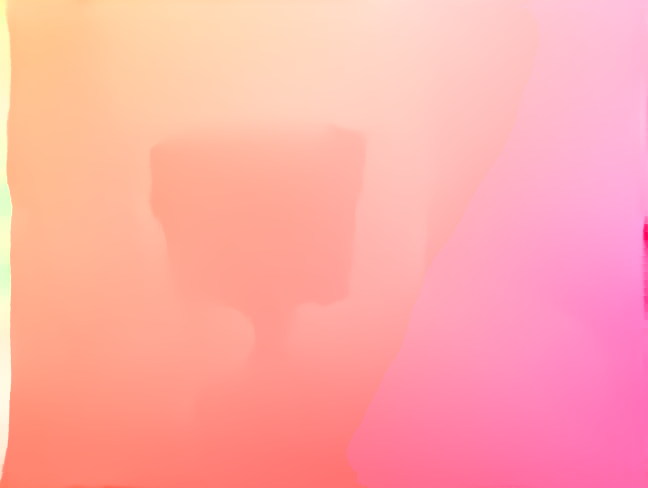

In [26]:
flow, valid = readFlowKITTI(flow_up_pths[20])
ret = visu.plot_flow(flow=flow, jupyter=True)

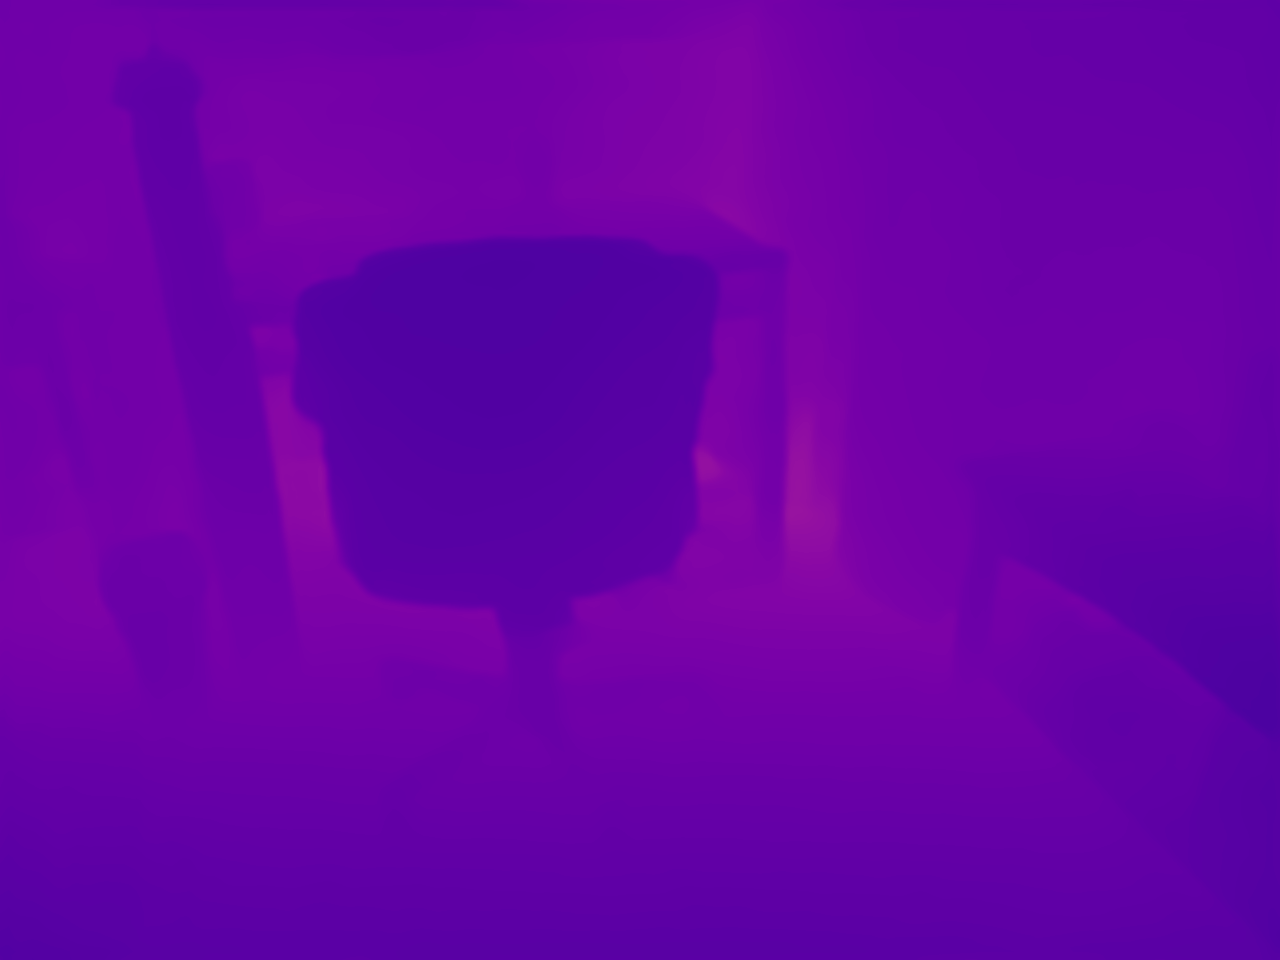

In [27]:
depth = readDepth(depth_pths[20])
ret = visu.plot_depth( depth , jupyter=True)